In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [13]:
df = pd.read_csv('Spotify-2000.csv')

# Explore EDA of arrests

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [4]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [5]:
df_num = df.iloc[:,5:14] # keep only columns from 5-14 and all rows

In [6]:
df_num

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness
0,157,30,53,-14,11,68,201,94,3
1,135,79,50,-11,17,81,207,17,7
2,168,69,66,-9,7,52,341,2,17
3,173,96,43,-4,3,37,269,0,4
4,106,82,58,-5,10,87,256,1,3
...,...,...,...,...,...,...,...,...,...
1989,94,21,70,-12,11,72,128,84,7
1990,175,76,36,-8,76,95,136,73,6
1991,168,80,53,-9,31,97,162,74,7
1992,174,26,45,-13,7,60,324,54,4


In [7]:
df_num.drop(['Length (Duration)'], axis = 1, inplace = True) 

In [8]:
df_num

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness
0,157,30,53,-14,11,68,94,3
1,135,79,50,-11,17,81,17,7
2,168,69,66,-9,7,52,2,17
3,173,96,43,-4,3,37,0,4
4,106,82,58,-5,10,87,1,3
...,...,...,...,...,...,...,...,...
1989,94,21,70,-12,11,72,84,7
1990,175,76,36,-8,76,95,73,6
1991,168,80,53,-9,31,97,74,7
1992,174,26,45,-13,7,60,54,4


In [9]:
df_num.describe()

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985
std,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566
min,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000
25%,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000
50%,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000
75%,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000
max,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000


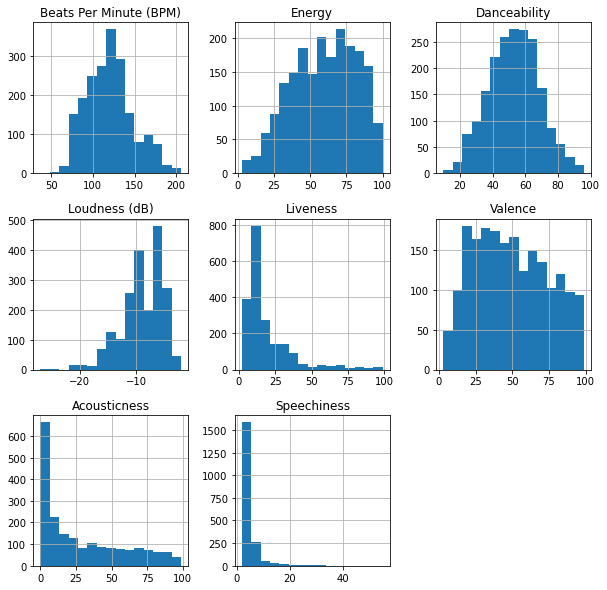

In [10]:
df_num.hist(bins=15, figsize=(10,10));

In [11]:
df_num.reset_index(drop=True,inplace=True) 

In [12]:
df_num

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness
0,157,30,53,-14,11,68,94,3
1,135,79,50,-11,17,81,17,7
2,168,69,66,-9,7,52,2,17
3,173,96,43,-4,3,37,0,4
4,106,82,58,-5,10,87,1,3
...,...,...,...,...,...,...,...,...
1989,94,21,70,-12,11,72,84,7
1990,175,76,36,-8,76,95,73,6
1991,168,80,53,-9,31,97,74,7
1992,174,26,45,-13,7,60,54,4
